In [2]:
import pandas as pd
df = pd.read_excel(r"C:\Users\Eriona\Documents\envierment_temperature.xlsx")

df.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [4]:
print(df.columns)


Index(['Area Code', 'Area', 'Months Code', 'Months', 'Element Code', 'Element',
       'Unit', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967',
       'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975',
       'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983',
       'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991',
       'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999',
       'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007',
       'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015',
       'Y2016', 'Y2017', 'Y2018', 'Y2019'],
      dtype='object')


In [5]:
# Filter data for the year 2010
df_2010 = df[['Area', 'Y2010']]

# Display the filtered DataFrame
print(df_2010.head())


          Area  Y2010
0  Afghanistan  3.601
1  Afghanistan  1.950
2  Afghanistan  1.212
3  Afghanistan  2.597
4  Afghanistan  3.390


In [6]:
# Filter data for May
df_may = df[df['Months'] == 'May']

# Calculate the average temperature for May in 2010
average_temperature_may_2010 = df_may['Y2010'].mean()

print(f"Average temperature for May in 2010 is: {average_temperature_may_2010}")


Average temperature for May in 2010 is: 0.922080808080808


In [9]:
import pandas as pd

# Filter data for selected states
selected_states = ['Albania', 'Greece', 'Italy']  # Specify the states you want
df_filtered_states = df[df['Area'].isin(selected_states)]

# Filter data for May
df_may = df_filtered_states[df_filtered_states['Months'] == 'May']

# Calculate the average temperature for May in 2010 for the selected states
average_temperature_may_2010 = df_may.groupby('Area')['Y2010'].mean()

print("Average temperature for May in 2010:")
print(average_temperature_may_2010)



Average temperature for May in 2010:
Area
Albania    1.0555
Greece     1.2215
Italy      0.7105
Name: Y2010, dtype: float64


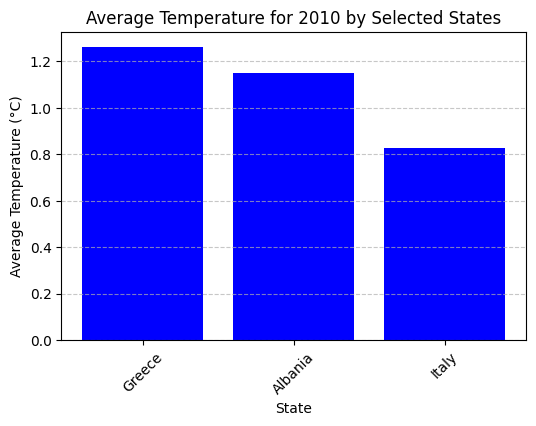

In [47]:
import matplotlib.pyplot as plt

# Filter data for selected states and calculate average temperature for 2010
df_state_temp_2010 = df_filtered_states.groupby('Area')['Y2010'].mean().reset_index()
df_state_temp_2010 = df_state_temp_2010.sort_values(by='Y2010', ascending=False)

# Plot the data
plt.figure(figsize=(6, 4))
plt.bar(df_state_temp_2010['Area'], df_state_temp_2010['Y2010'], color='b')
plt.xlabel('State')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature for 2010 by Selected States')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



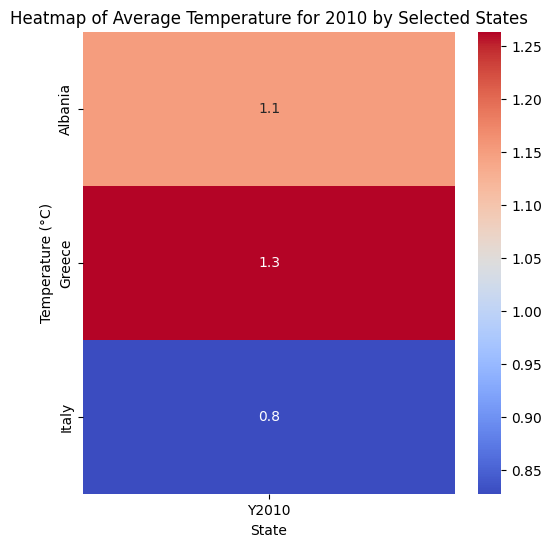

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for the heatmap
heatmap_data = df_filtered_states.pivot_table(index='Area', values='Y2010')

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True, fmt='.1f')
plt.xlabel('State')
plt.ylabel('Temperature (°C)')
plt.title('Heatmap of Average Temperature for 2010 by Selected States')
plt.show()


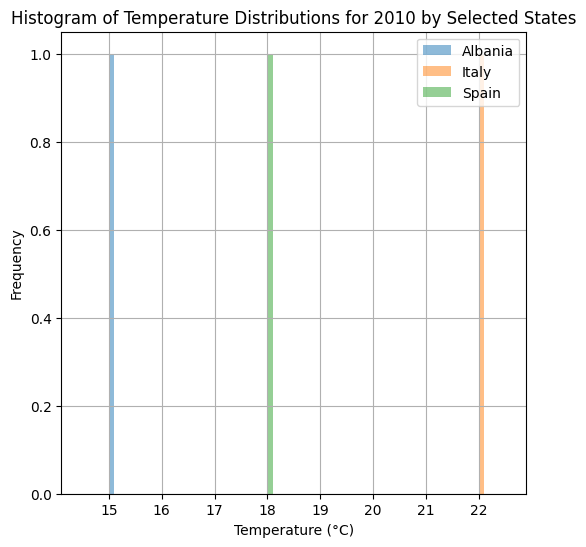

In [49]:
import matplotlib.pyplot as plt

# Specify selected states
selected_states = ['Albania', 'Italy', 'Spain']  # Replace with your selected states

# Filter data for selected states and year 2010
df_filtered = df[df['Area'].isin(selected_states)]
df_year = df_filtered[['Area', 'Y2010']]

# Plot histogram
plt.figure(figsize=(6, 6))
for state in selected_states:
    state_data = df_year[df_year['Area'] == state]['Y2010']
    plt.hist(state_data, bins=10, alpha=0.5, label=state)

plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature Distributions for 2010 by Selected States')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


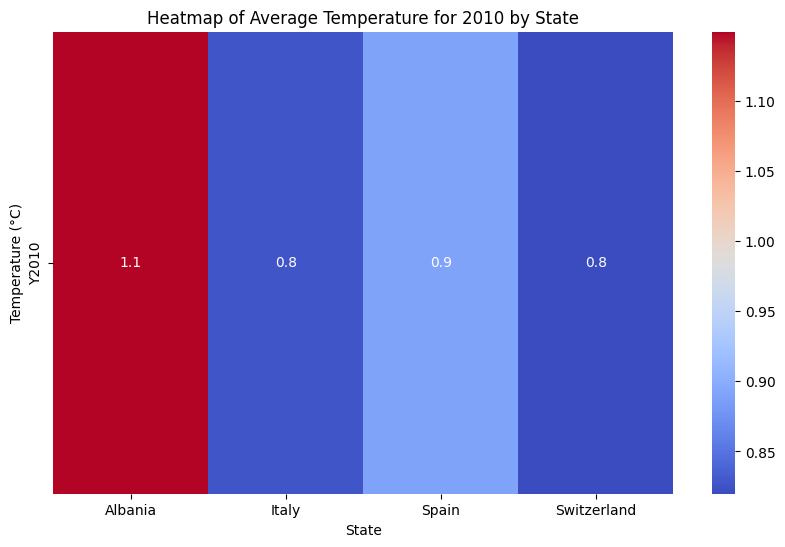

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of selected states for the analysis
selected_states = ['Albania', 'Italy', 'Spain', 'Switzerland']

# Filter the DataFrame to include only rows for the selected states
df_selected_states = df[df['Area'].isin(selected_states)]

# Group the filtered data by 'Area' and calculate the average temperature for 2010
df_state_temp_2010 = df_selected_states.groupby('Area')['Y2010'].mean().reset_index()

# Prepare the data for the heatmap by setting 'Area' as the index and transposing the DataFrame
heatmap_data = df_state_temp_2010.set_index('Area').transpose()

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Create a heatmap to visualize the average temperature for 2010 by state
# 'annot=True' adds values to each cell in the heatmap
# 'cmap='coolwarm'' specifies the color map to use
# 'cbar=True' adds a color bar to the heatmap
# 'fmt='.1f'' formats the numbers to one decimal place
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True, fmt='.1f')

# Add label for the x-axis
plt.xlabel('State')

# Add label for the y-axis
plt.ylabel('Temperature (°C)')

# Add a title to the heatmap
plt.title('Heatmap of Average Temperature for 2010 by State')

# Display the heatmap
plt.show()


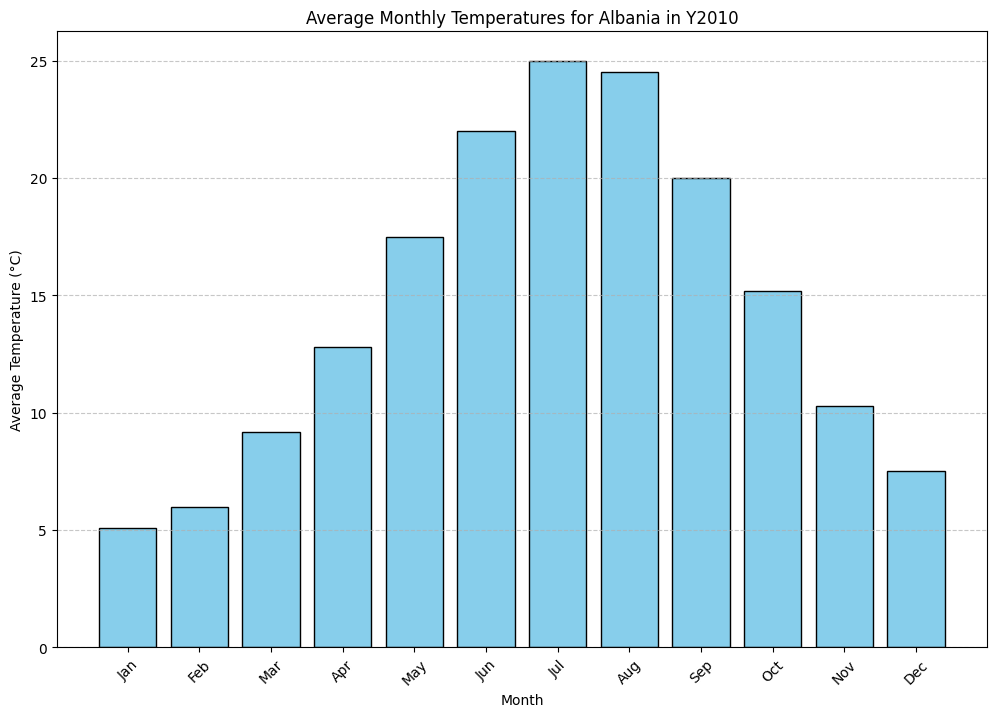

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with monthly temperature data
data = {
    'Area': ['Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania'],
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'Y2010': [5.1, 6.0, 9.2, 12.8, 17.5, 22.0, 25.0, 24.5, 20.0, 15.2, 10.3, 7.5]
}
df = pd.DataFrame(data)

# Define the state and year for which you want to visualize data
state = 'Albania'
year = 'Y2010'

# Filter the DataFrame for the selected state and year
df_state = df[df['Area'] == state]

# Plotting histogram for each month
plt.figure(figsize=(12, 8))
plt.bar(df_state['Month'], df_state[year], color='skyblue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title(f'Average Monthly Temperatures for {state} in {year}')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()







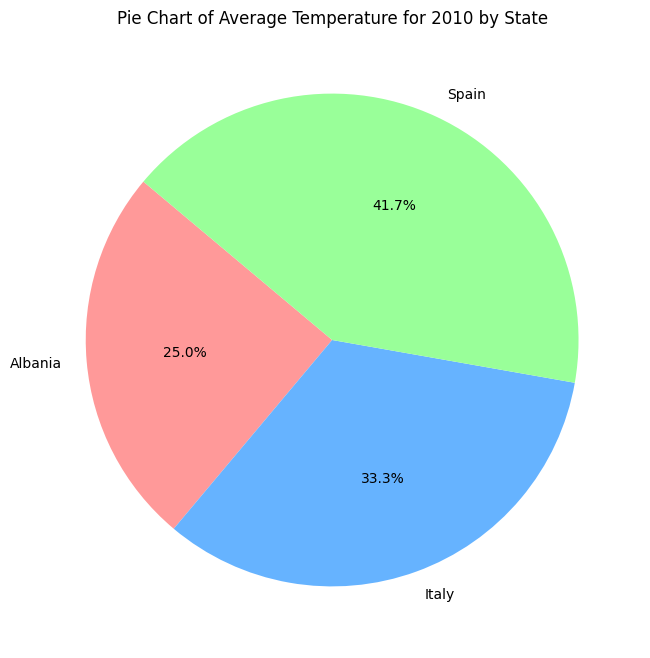

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
df = pd.DataFrame({
    'Area': ['Albania', 'Italy', 'Spain'],
    'Y2010': [15, 20, 25]
})

# Calculate average temperature for each state
df_state_temp_2010 = df.groupby('Area')['Y2010'].mean().reset_index()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_state_temp_2010['Y2010'], labels=df_state_temp_2010['Area'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Pie Chart of Average Temperature for 2010 by State')
plt.show()


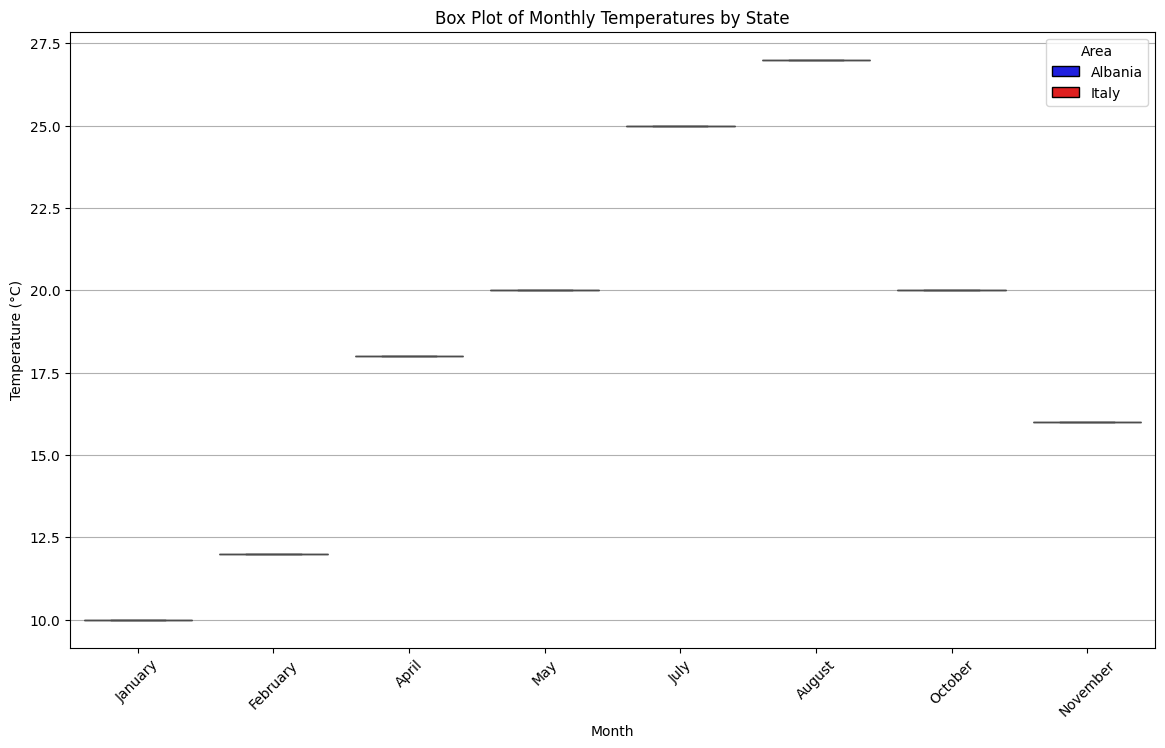

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
df = pd.DataFrame({
    'Area': ['Albania', 'Italy', 'Spain'] * 12,
    'Months': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] * 3,
    'Temperature': [10, 12, 15, 18, 20, 22, 25, 27, 23, 20, 16, 12] * 3
})

# Filter data for selected states
selected_states = ['Albania', 'Italy']
df_filtered = df[df['Area'].isin(selected_states)]

# Define a specific color palette
palette = {'Albania': 'blue', 'Italy': 'red'}

plt.figure(figsize=(14, 8))
sns.boxplot(x='Months', y='Temperature', data=df_filtered, hue='Area', palette=palette, linewidth=1,
            boxprops=dict(facecolor='white', edgecolor='black', alpha=1))

plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Box Plot of Monthly Temperatures by State')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


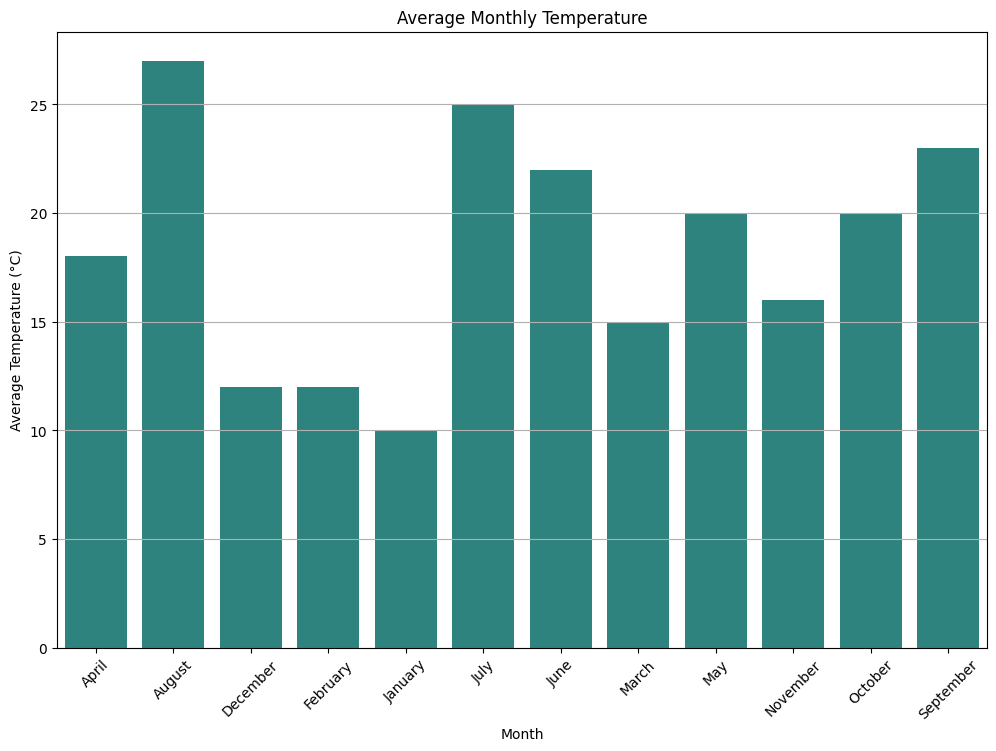

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
df = pd.DataFrame({
    'Months': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] * 3,
    'Temperature': [10, 12, 15, 18, 20, 22, 25, 27, 23, 20, 16, 12] * 3
})

# Calculate average temperature for each month
df_monthly_avg = df.groupby('Months')['Temperature'].mean().reset_index()

# Add a constant column to use as hue
df_monthly_avg['Category'] = 'Temperature'

plt.figure(figsize=(12, 8))

# Create the bar plot with hue
sns.barplot(x='Months', y='Temperature', data=df_monthly_avg, palette='viridis', hue='Category')

plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Monthly Temperature')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Hide the legend to match the previous visual style
plt.legend([], [], frameon=False)

# Show the plot
plt.show()


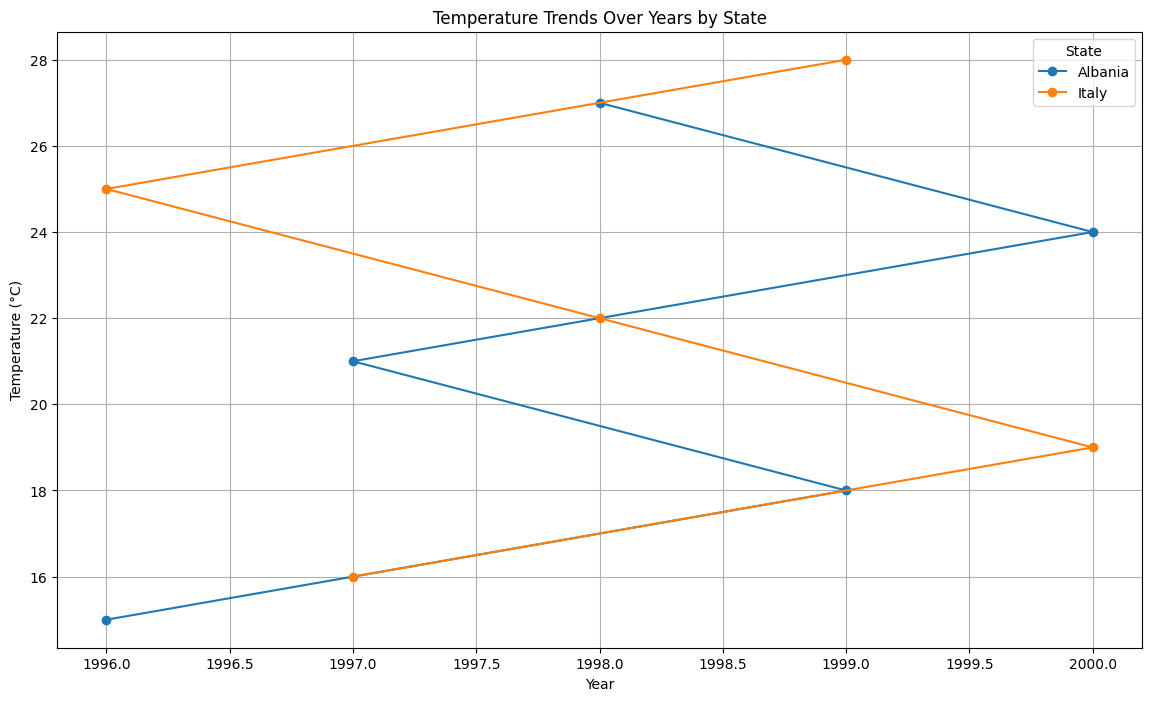

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
df = pd.DataFrame({
    'Area': ['Albania', 'Italy', 'Spain'] * 5,
    'Year': [1996, 1997, 1998, 1999, 2000] * 3,
    'Temperature': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
})

# Filter data for selected states
selected_states = ['Albania', 'Italy']
df_filtered = df[df['Area'].isin(selected_states)]

plt.figure(figsize=(14, 8))
for state in selected_states:
    df_state = df_filtered[df_filtered['Area'] == state]
    plt.plot(df_state['Year'], df_state['Temperature'], marker='o', label=state)

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends Over Years by State')
plt.legend(title='State')
plt.grid(True)
plt.show()


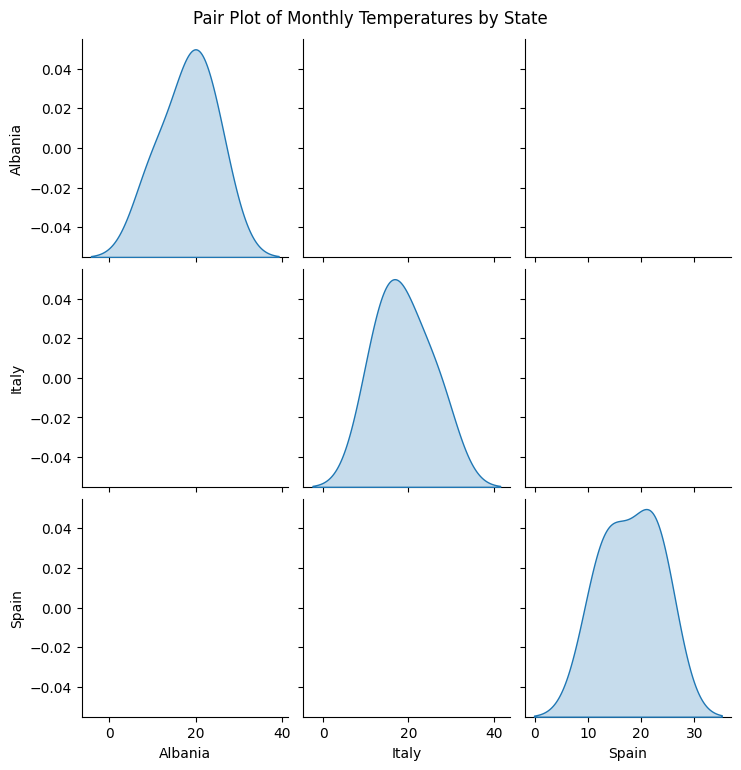

In [26]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
df = pd.DataFrame({
    'Months': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] * 3,
    'Temperature': [10, 12, 15, 18, 20, 22, 25, 27, 23, 20, 16, 12] * 3,
    'Area': ['Albania', 'Italy', 'Spain'] * 12
})

# Pivot the DataFrame for pair plotting
df_pivot = df.pivot_table(index='Months', columns='Area', values='Temperature')

# Plot Pair Plot
sns.pairplot(df_pivot, diag_kind='kde')
plt.suptitle('Pair Plot of Monthly Temperatures by State', y=1.02)
plt.show()


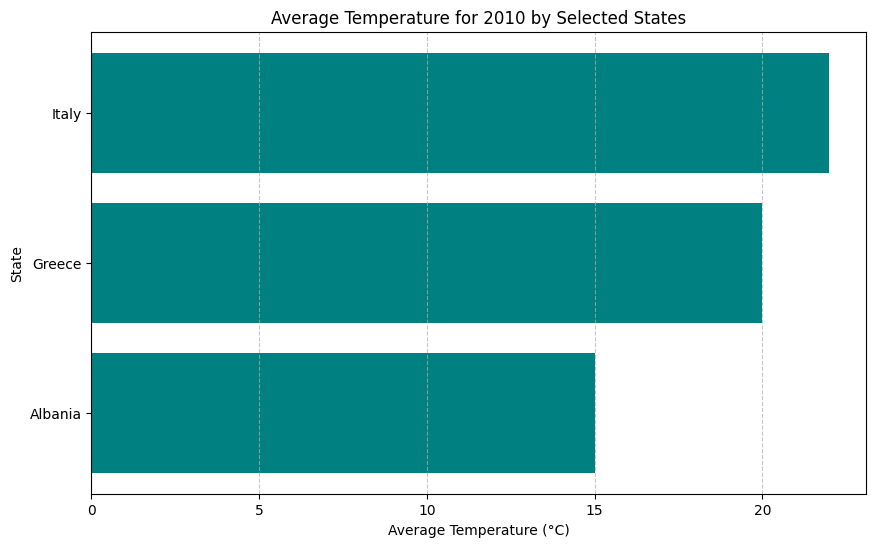

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your DataFrame (replace this with your actual DataFrame)
data = {
    'Area': ['Albania', 'Greece', 'Italy', 'Spain', 'Switzerland'],
    'Y2010': [15, 20, 22, 18, 16]
}
df = pd.DataFrame(data)

# Define the states you want to visualize
selected_states = ['Albania', 'Greece', 'Italy']

# Filter the DataFrame to include only the selected states
df_selected_states = df[df['Area'].isin(selected_states)]

# Calculate the average temperature for 2010 by state
df_state_temp_2010 = df_selected_states.groupby('Area')['Y2010'].mean().reset_index()

# Sort values by average temperature
df_state_temp_2010 = df_state_temp_2010.sort_values(by='Y2010', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(df_state_temp_2010['Area'], df_state_temp_2010['Y2010'], color='teal')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('State')
plt.title('Average Temperature for 2010 by Selected States')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
